<a href="https://colab.research.google.com/github/SyedZohair09/EDULUMOS-INTERSHIP-TASKS/blob/main/Syed_Zohair_week3_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [3]:
df=pd.read_csv("/content/Mall_Customers.csv")

df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


# EDA ANALYSIS

/tmp/ipython-input-3737231236.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Spending Score (1-100)'])


<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

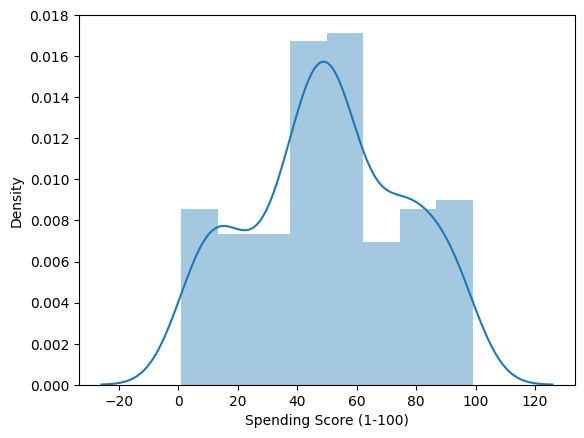

In [12]:
sns.distplot(df['Spending Score (1-100)'])

<Axes: xlabel='count', ylabel='Gender'>

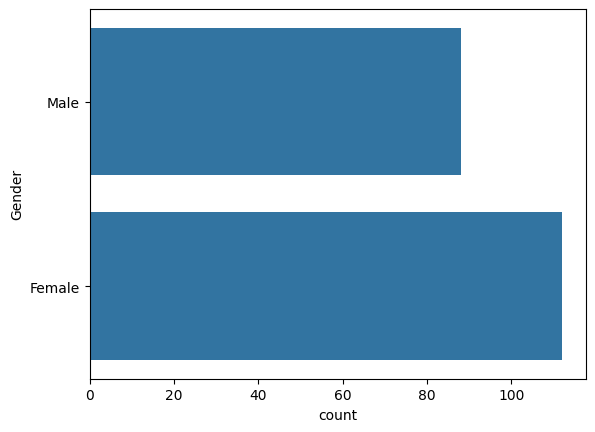

In [9]:
sns.countplot(df['Gender'])

/tmp/ipython-input-3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

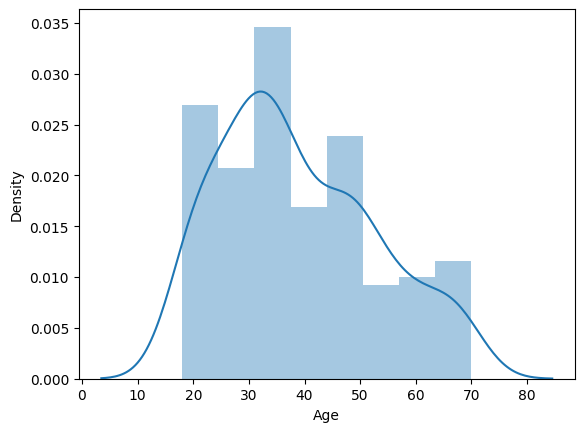

In [10]:
sns.distplot(df['Age'])

In [19]:
#clustering on 2 features

df1=df[['Annual Income (k$)','Spending Score (1-100)']]

df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

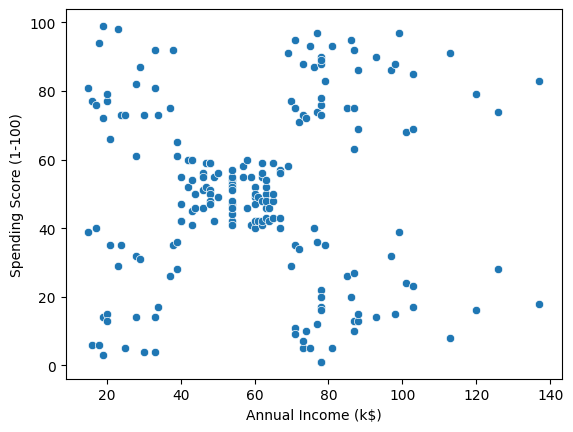

In [22]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df1)

In [24]:
from sklearn.cluster import KMeans
error=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df1)
    error.append(kmeans.inertia_)

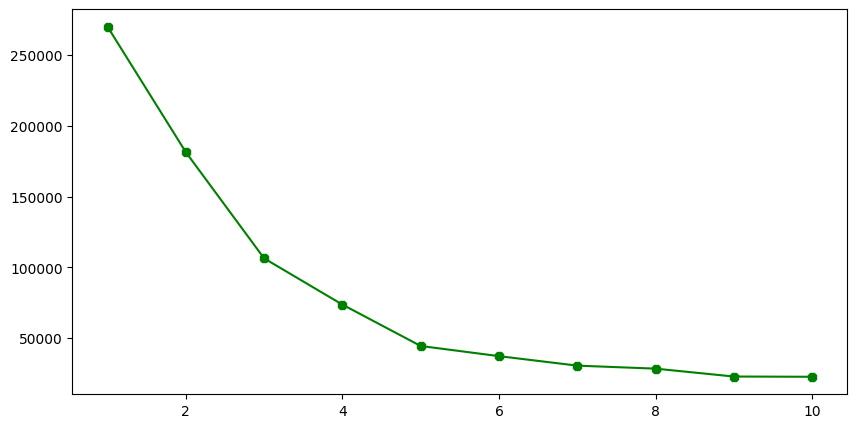

In [26]:
# elbow method graph

plt.figure(figsize=(10,5))
plt.plot(range(1,11),error,color='green',marker='8')
plt.xlabel="no. of clusters"
plt.ylabel="WCSS"
plt.show()

In [27]:
km=KMeans(n_clusters=5)
model=km.fit(df1)

y_pred=km.predict(df1)
df1['Label']=y_pred

/tmp/ipython-input-790073435.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Label']=y_pred


In [31]:
df1.tail(10)

,Annual Income (k$),Spending Score (1-100),Label
190,103,23,4
191,103,69,2
192,113,8,4
193,113,91,2
194,120,16,4
195,120,79,2
196,126,28,4
197,126,74,2
198,137,18,4
199,137,83,2


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

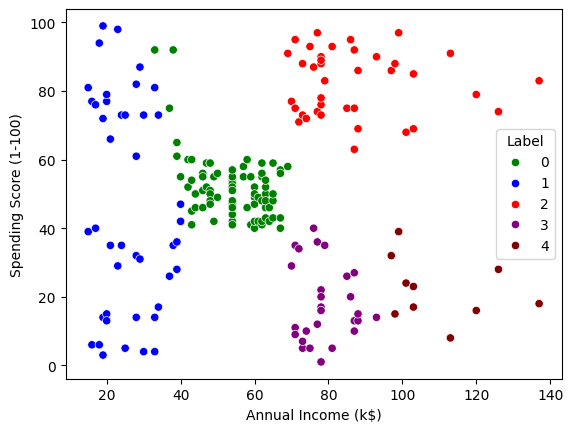

In [36]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df1,hue='Label',palette=['green','blue','red','purple','maroon'])

Cluster For 3 features

In [38]:
#clustering on 3 features

df2=df[['Annual Income (k$)','Spending Score (1-100)','Age']]

df2.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


In [39]:
from sklearn.cluster import KMeans
error=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df2)
    error.append(kmeans.inertia_)

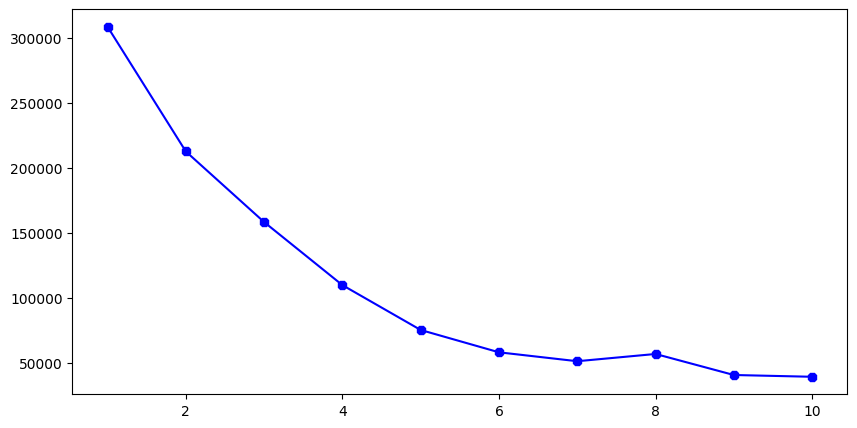

In [43]:
# elbow method graph

plt.figure(figsize=(10,5))
plt.plot(range(1,11),error,color='blue',marker='8')
plt.xlabel="no. of clusters"
plt.ylabel="WCSS"
plt.xticks=(1,11,2)
plt.show()

In [45]:
km=KMeans(n_clusters=5)
model=km.fit(df2)

y_pred=km.predict(df2)
df2['Label']=y_pred

df2.tail()

/tmp/ipython-input-193456048.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Label']=y_pred


,Annual Income (k$),Spending Score (1-100),Age,Label
195,120,79,35,2
196,126,28,45,1
197,126,74,32,2
198,137,18,32,1
199,137,83,30,2


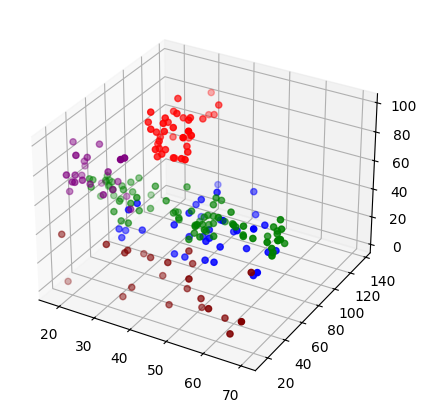

In [50]:
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(111,projection='3d')

ax.scatter(df2['Age'][df2['Label']==0],df2['Annual Income (k$)'][df2['Label']==0],df2['Spending Score (1-100)'][df2['Label']==0],color='green')
ax.scatter(df2['Age'][df2['Label']==1],df2['Annual Income (k$)'][df2['Label']==1],df2['Spending Score (1-100)'][df2['Label']==1],color='blue')
ax.scatter(df2['Age'][df2['Label']==2],df2['Annual Income (k$)'][df2['Label']==2],df2['Spending Score (1-100)'][df2['Label']==2],color='red')
ax.scatter(df2['Age'][df2['Label']==3],df2['Annual Income (k$)'][df2['Label']==3],df2['Spending Score (1-100)'][df2['Label']==3],color='purple')
ax.scatter(df2['Age'][df2['Label']==4],df2['Annual Income (k$)'][df2['Label']==4],df2['Spending Score (1-100)'][df2['Label']==4],color='maroon')

plt.xalbel='Age'
plt.ylabel='Annual Income (k$)'
plt.zlabel='Spending Score (1-100)'

plt.show()
